KISMİ EN KÜÇÜK KARELER REGRESYONU

pcr benziyor
çok boyutlu projelerde kullanılıbilir
ne farkı var 


In [8]:
import pandas as pd
import numpy as np 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df.Salary
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float32")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)                
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)


In [10]:
from sklearn.cross_decomposition import PLSRegression,PLSSVD

In [11]:
pls_model=PLSRegression(n_components=2).fit(X_train,y_train)

In [12]:
pls_model.coef_

C:\Users\user\anaconda3\envs\tensor\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

In [26]:
y_train[:1]

183    125.0
Name: Salary, dtype: float64

In [28]:
#PLS TAHMIN
y_pred=pls_model.predict(X_train)


array([[ 344.91941675],
       [ 848.87070829],
       [ 692.93622641],
       [ 185.56578014],
       [ 435.49195955],
       [ 987.49529232],
       [ 120.63096991],
       [ 289.92634166],
       [ 663.41886999],
       [ 817.90487366],
       [1400.82155973],
       [ 889.55177296],
       [ 966.02942388],
       [ 761.83859605],
       [ 817.8721976 ],
       [ 778.83233428],
       [ 947.29337049],
       [   2.76773513],
       [ -72.48002311],
       [ 382.9911773 ],
       [ 596.85479633],
       [ 977.61609482],
       [ 415.33783836],
       [ 464.78071993],
       [ -26.62516381],
       [ 722.22493084],
       [ 494.50573366],
       [ 242.23751463],
       [ 206.92614915],
       [ 232.56491078],
       [  64.48242585],
       [ 542.14513533],
       [ 947.14732426],
       [ 194.8958382 ],
       [ 362.62023455],
       [ 295.26950414],
       [ 439.33441782],
       [ 776.65786942],
       [ 317.39738017],
       [ 137.13822956],
       [ 103.25963353],
       [ 206.203

In [20]:
np.sqrt(mean_squared_error(y_train,y_pred))

310.11675891433265

In [23]:
#egitim hatası
y_pred=pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

398.0995638069769

<font color="orange"> MODEL TUNNING

In [31]:
from sklearn import model_selection 
from sklearn.metrics import cross_val_score

ImportError: cannot import name 'cross_val_score' from 'sklearn.metrics' (C:\Users\user\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\__init__.py)

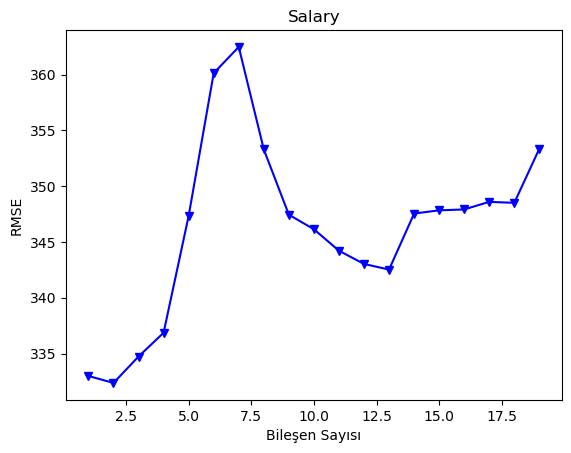

In [36]:
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*model_selection.cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "b")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [37]:
# en uygun deger yukarıdaki grafiğe göre 2 bileşendir yeniden 2 bileşene göre model kurmak daha mantıklıdır

In [51]:
model=PLSRegression(n_components=2).fit(X_train,y_train)

In [54]:
y_pred=model.predict(X_test) # test hatası

In [58]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [59]:
rmse # test hatamız root mean squared error

398.0995638069769